# Project 3 Code

## Data Preparation

In [28]:
# import the data
import pandas as pd
df = pd.read_csv('wine.csv')

# show first few rows
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [29]:
# Analyze for missing values
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [30]:
# drop missing values
df = df.dropna()

In [31]:
# show shape of data frame
df.shape

(6463, 13)

In [32]:
# show data types
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## EDA

Text(0.5, 1.0, 'Histogram of Quality')

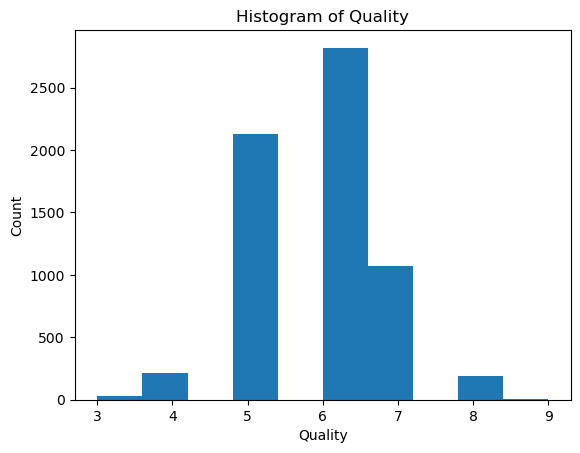

In [33]:
# import matplotlib and show histogram of claim quality
import matplotlib.pyplot as plt

plt.hist(df['quality'])
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Histogram of Quality')

In [34]:
# Show statistics of quality
df['quality'].describe()

count    6463.000000
mean        5.818505
std         0.873286
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

C:\Users\allie\AppData\Local\Temp\ipykernel_10220\929671692.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


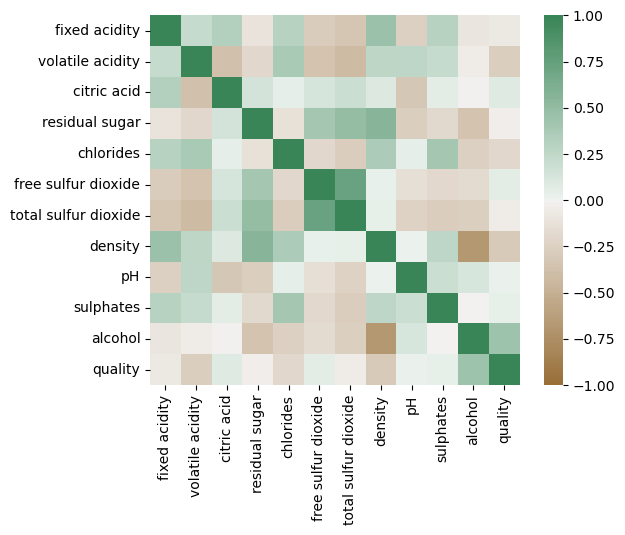

In [35]:
# Show correlation heatmap
import seaborn as sns
correlation = df.corr()

axis_corr = sns.heatmap(
correlation,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

C:\Users\allie\AppData\Local\Temp\ipykernel_10220\2587193015.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = df.groupby('quality').mean().sort_values('pH').index


Text(0.5, 1.0, 'pH and Quality')

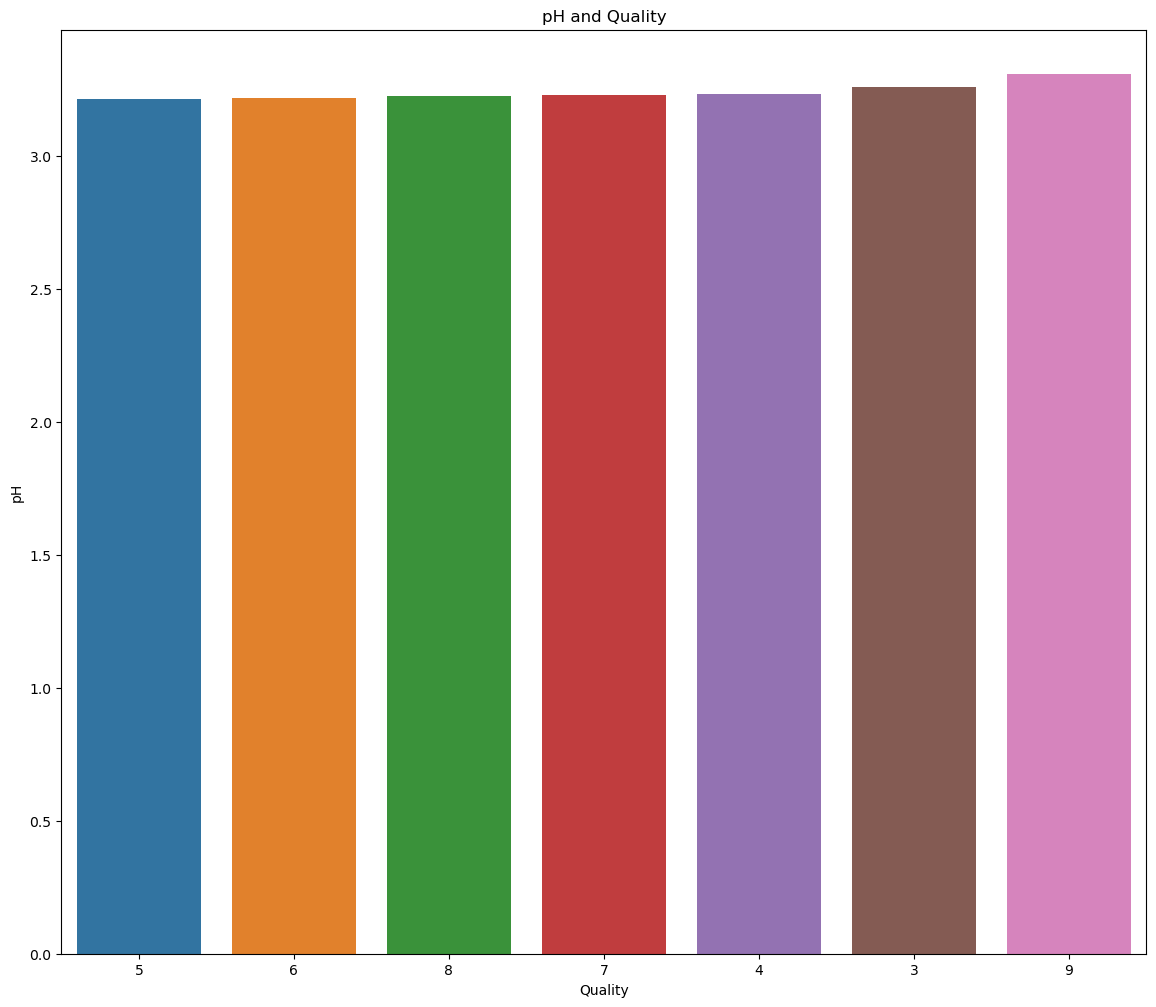

In [36]:
# Show how pH impacts the quality
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14,12))
order = df.groupby('quality').mean().sort_values('pH').index
sns.barplot(
    x='quality',
    y='pH',
    data=df,
    order=order,
    errorbar=None,
)
plt.xlabel('Quality')
plt.ylabel('pH')
plt.title('pH and Quality')

In [37]:
# range of alcohol contents in the data set
df['alcohol'].describe()

count    6463.000000
mean       10.492825
std         1.193128
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

In [38]:
# count of red vs white wines
df['type'].value_counts()

white    4870
red      1593
Name: type, dtype: int64

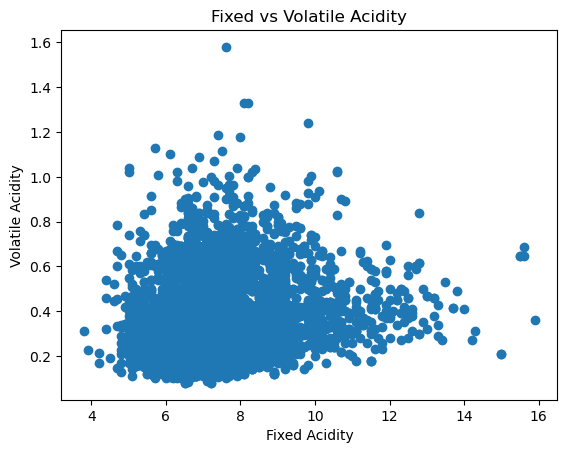

In [39]:
# show scatter plot of fixed acidity vs volatile acidity
plt.scatter(df['fixed acidity'], df['volatile acidity'])
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.title('Fixed vs Volatile Acidity')
plt.show()

In [40]:
# Show statistics of density
df['density'].describe()

count    6463.000000
mean        0.994698
std         0.003001
min         0.987110
25%         0.992330
50%         0.994890
75%         0.997000
max         1.038980
Name: density, dtype: float64

Text(0.5, 1.0, 'Average Quality by Type')

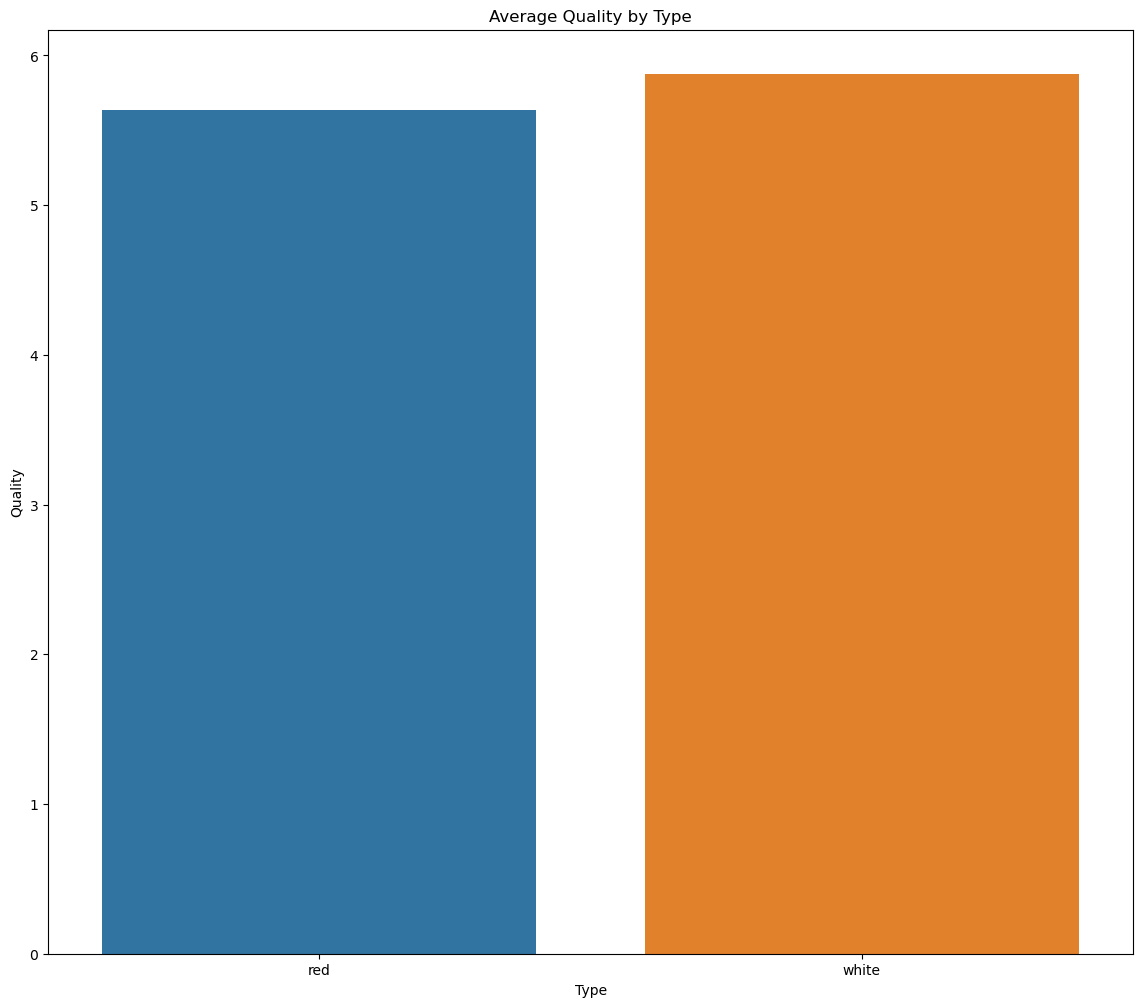

In [41]:
# Show average quality rating by type
fig = plt.figure(figsize=(14,12))
order = df.groupby('type').mean().sort_values('quality').index
sns.barplot(
    x='type',
    y='quality',
    data=df,
    order=order,
    errorbar=None,
)
plt.xlabel('Type')
plt.ylabel('Quality')
plt.title('Average Quality by Type')

In [42]:
# number of wines with a rating of 8 or above
high_df = df[df['quality'] >= 8]
high_df.shape[0]

197

In [45]:
# percentage of wines with a rating of 4 or below
high_df = df[df['quality'] <= 4]
high_df.shape[0]/df.shape[0]*100

3.775336531022745

## Modeling

In [13]:
# Convert categorical variables to dummies
df = pd.get_dummies(df)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1


In [14]:
# split into features and target dataframes
features_df = df.loc[:, df.columns != 'quality']
target_df = df['quality']

# split into training and testing data
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features_df, target_df, 
                                                                            test_size = 0.2, random_state = 1)

### Random Forest Regression

In [15]:
# Fit a Random Forest Regression model to the data
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(features_train, target_train)
rf_pred = rf.predict(features_test)

In [16]:
# print the r2 value
from sklearn.metrics import r2_score
r2_score(target_test, rf_pred)

0.5176557033124192

In [17]:
# Print the RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(target_test, rf_pred, squared=False)

0.6125552202959608

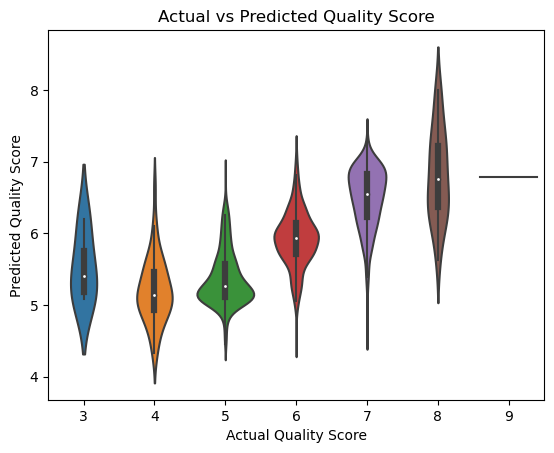

In [18]:
# Plot the predicted vs actual
ax = sns.violinplot(x=target_test, y=rf_pred)
ax.set(xlabel='Actual Quality Score', ylabel='Predicted Quality Score', title = 'Actual vs Predicted Quality Score')
plt.show()

### Linear Regression

In [19]:
# fit a linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(features_train, target_train)
lm_pred = model.predict(features_test)

In [20]:
# print the r2 value
r2_score(target_test, lm_pred)

0.30577160716699203

In [21]:
# Print the RMSE
mean_squared_error(target_test, lm_pred, squared=False)

0.7348824184423312

### Polynomial Regression

In [22]:
# fit a polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
poly_model = Pipeline([('poly', PolynomialFeatures(degree=3)),
        ('linear', LinearRegression(fit_intercept=False))])
poly_model.fit(features_train, target_train)
poly_pred = poly_model.predict(features_test)

In [23]:
# print the r2 value
r2_score(target_test, poly_pred)

0.3332670531294354

In [24]:
# Print the RMSE
mean_squared_error(target_test, poly_pred, squared=False)

0.7201826088761696